# 1. Import libraries

In [11]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import base, metrics, model_selection, preprocessing, tree, utils
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
import shap
import xgboost as xgb
import pandas_profiling
import itertools
import phik
from phik import resources
from phik.binning import bin_data
from phik.report import plot_correlation_matrix
from IPython.display import Image
import matplotlib.pyplot as plt

# 2. Import the Data

In [12]:
data = pd.read_csv("FRP-confined corroded RC columns_Database.csv",index_col=0)
data.head()

,Spec.,D,H,b,h,Ag,Circular,r,ρ,fc,...,tfrp,Efrp,Ffrp,Ltype,ρs,Ebar,Fbar,e,η,Pmax
No.,,,,,,,,,,,,,,,,,,,,,
1,CFRP1,152,457,−,−,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,36.0,774.0
2,CFRP2,152,457,−,−,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,45.0,720.6
3,CFRP3,152,457,−,−,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,25.0,747.3
4,CFRP4,152,457,−,−,18136.64,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"4 NO,9.5",1.563292,209.0,483.0,0.0,51.0,645.0
5,CFRP-COR,203,914,−,−,32349.07,Yes,0,1.0,21.0,...,0.17,228.0,3790.0,"8 NO,9.5",1.752933,209.0,483.0,0.0,0.0,1926.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 1 to 285
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Spec.     285 non-null    object 
 1   D         285 non-null    object 
 2   H         285 non-null    int64  
 3   b         285 non-null    object 
 4   h         285 non-null    object 
 5   Ag        285 non-null    float64
 6   Circular  285 non-null    object 
 7   r         285 non-null    int64  
 8   ρ         285 non-null    float64
 9   fc        285 non-null    float64
 10  FRPtype   285 non-null    object 
 11  Nfrp      285 non-null    int64  
 12  tfrp      285 non-null    float64
 13  Efrp      285 non-null    float64
 14  Ffrp      285 non-null    float64
 15  Ltype     285 non-null    object 
 16  ρs        285 non-null    float64
 17  Ebar      285 non-null    float64
 18  Fbar      285 non-null    float64
 19  e         285 non-null    float64
 20  η         285 non-null    float6

In [14]:
# All the Data

Data= data[[ 'Ag', 'ρ', 'fc',   'tfrp', 'Efrp', 'Ffrp', 'ρs', 'Ebar','Fbar','e','η','Pmax']]
# Concentric RC-Columns only
DataConcentric = Data[(Data["e"]==0)]
DataConcentric = DataConcentric.drop('e', axis = 1)

# Eccentric RC-Columns only
DataEccentric =  Data[(Data["e"] > 0)]


# 3. Exploratory Data Analysis

In [15]:
Data1= data[[ 'D','H','b','h','Ag', 'r','ρ', 'fc', 'tfrp', 'Efrp', 'Ffrp', 'ρs', 'Ebar','Fbar','e','η','Pmax']]

In [16]:
Data1.describe()

,H,Ag,r,ρ,fc,tfrp,Efrp,Ffrp,ρs,Ebar,Fbar,e,η,Pmax
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,504.175439,23476.770702,6.859649,0.798165,32.574386,0.223158,169.113509,2933.922667,2.738450,206.701053,415.249754,0.177761,10.007895,972.548000
std,253.020592,11067.611156,15.077778,0.345527,7.364395,0.222552,111.106127,1662.900210,1.248581,11.863070,80.541068,0.505029,9.541536,653.436967
min,150.000000,7850.000000,0.000000,0.000000,17.700000,0.000000,0.000000,0.000000,0.893609,199.100000,210.000000,0.000000,0.000000,39.960000
25%,320.000000,15625.000000,0.000000,0.466667,25.300000,0.166000,65.400000,1342.600000,2.010619,200.000000,363.370000,0.000000,0.000000,379.000000
50%,450.000000,18617.060000,0.000000,1.000000,31.500000,0.167000,234.000000,3499.000000,2.560000,200.000000,430.700000,0.000000,7.420000,946.000000
75%,500.000000,31400.000000,0.000000,1.000000,38.300000,0.260000,265.000000,4300.000000,2.561298,210.000000,460.000000,0.000000,16.500000,1519.900000
max,1375.000000,49087.400000,75.000000,1.000000,47.000000,1.682000,280.000000,4900.000000,6.785840,237.000000,550.000000,3.440000,51.000000,2536.110000


# 3.1. Exploratory Data Analysis

In [17]:
interval_cols = ['Ag', 'ρ', 'fc', 'tfrp', 'Efrp', 'Ffrp', 'ρs', 'Ebar','Fbar','e','η','Pmax']
bins = {'Ag':30,'ρ':30,'fc':30, 'tfrp':30, 'Efrp':30, 'Ffrp':30, 'ρs':30, 'Ebar':30,'Fbar':30,'e':30, 'η':30,'Pmax':30}
phik_overview = Data.phik_matrix(interval_cols=interval_cols, bins=bins)
phik_overview

,Ag,ρ,fc,tfrp,Efrp,Ffrp,ρs,Ebar,Fbar,e,η,Pmax
Ag,1.000000,0.959814,0.956634,0.655755,0.892439,0.844916,0.915575,0.772977,0.927894,0.846572,0.839765,0.768307
ρ,0.959814,1.000000,0.933668,0.572898,0.787593,0.758343,0.862654,0.174340,0.782796,0.837244,0.749421,0.632152
fc,0.956634,0.933668,1.000000,0.869056,0.898334,0.938745,0.933571,0.973010,0.950428,0.868606,0.839580,0.805401
tfrp,0.655755,0.572898,0.869056,1.000000,0.827817,0.876313,0.747437,0.852008,0.724583,0.415248,0.528508,0.757052
Efrp,0.892439,0.787593,0.898334,0.827817,1.000000,0.955344,0.829966,0.883432,0.817475,0.586861,0.643244,0.666899
Ffrp,0.844916,0.758343,0.938745,0.876313,0.955344,1.000000,0.881703,0.850804,0.872334,0.673142,0.670370,0.747223
ρs,0.915575,0.862654,0.933571,0.747437,0.829966,0.881703,1.000000,0.859833,0.922222,0.833210,0.754032,0.714301
Ebar,0.772977,0.174340,0.973010,0.852008,0.883432,0.850804,0.859833,1.000000,0.910580,0.000000,0.568378,0.756384
Fbar,0.927894,0.782796,0.950428,0.724583,0.817475,0.872334,0.922222,0.910580,1.000000,0.731916,0.737190,0.747501
e,0.846572,0.837244,0.868606,0.415248,0.586861,0.673142,0.833210,0.000000,0.731916,1.000000,0.524161,0.711633


# 3.2. Correlation Phik (φk)

In [18]:
Sxindex=[r'$A_g$',  r'$ρ$', r'$f_c$',  r'$t_{frp}$',
       r'$E_{frp}$',  r'$F_{frp}$',r'$ρ_s$',  r'$E_{bar}$',r'$F_{bar}$',r'$e$', r'$η$', r'$P_{max}$']
Syindex=[r'$A_g$',  r'$ρ$', r'$f_c$',  r'$t_{frp}$',
       r'$E_{frp}$',  r'$F_{frp}$',r'$ρ_s$',  r'$E_{bar}$',r'$F_{bar}$',r'$e$', r'$η$', r'$P_{max}$']

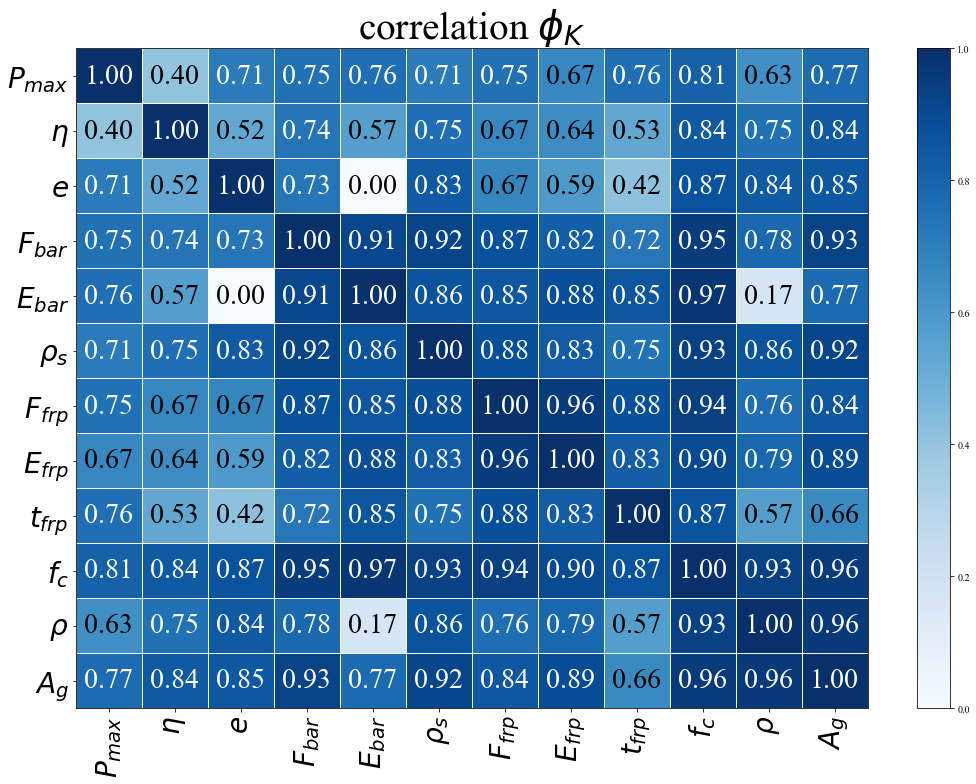

In [19]:
plt.rcParams["font.family"] = "Times New Roman" # ou serif
plot_correlation_matrix(phik_overview.values, x_labels=Sxindex, y_labels=Syindex, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=2.8,
                        figsize=(15,11))
plt.yticks(fontname='Times New Roman', fontsize=28)


plt.xticks(fontname='Times New Roman', fontsize=28)
plt.tight_layout()

In [20]:
significance_overview = Data.significance_matrix(interval_cols=interval_cols, bins = bins)
significance_overview

,Ag,ρ,fc,tfrp,Efrp,Ffrp,ρs,Ebar,Fbar,e,η,Pmax
Ag,26.626717,17.073081,20.570362,9.355984,14.921749,14.286781,18.244580,12.878097,21.829751,14.562083,10.013610,8.447086
ρ,17.073081,21.442165,16.565929,6.619376,9.439403,10.426753,13.897109,3.773509,13.071342,13.520510,8.707276,4.774746
fc,20.570362,16.565929,28.400829,13.750229,20.122205,21.055763,21.239716,14.802486,22.574202,12.023695,12.969661,8.441388
tfrp,9.355984,6.619376,13.750229,26.498866,18.322418,18.268497,11.433822,11.070396,12.337303,3.940200,4.213990,5.813735
Efrp,14.921749,9.439403,20.122205,18.322418,29.730221,24.607897,16.020664,15.683143,17.781358,6.926546,8.034856,7.136611
Ffrp,14.286781,10.426753,21.055763,18.268497,24.607897,28.214621,17.304707,14.969738,18.089362,7.623004,7.242991,6.883319
ρs,18.244580,13.897109,21.239716,11.433822,16.020664,17.304707,27.974309,12.779614,20.375897,10.891597,9.303045,7.426854
Ebar,12.878097,3.773509,14.802486,11.070396,15.683143,14.969738,12.779614,23.039557,16.213066,1.829093,4.396244,6.869219
Fbar,21.829751,13.071342,22.574202,12.337303,17.781358,18.089362,20.375897,16.213066,29.295749,10.168189,9.743872,9.361594
e,14.562083,13.520510,12.023695,3.940200,6.926546,7.623004,10.891597,1.829093,10.168189,19.644301,4.966094,7.104842


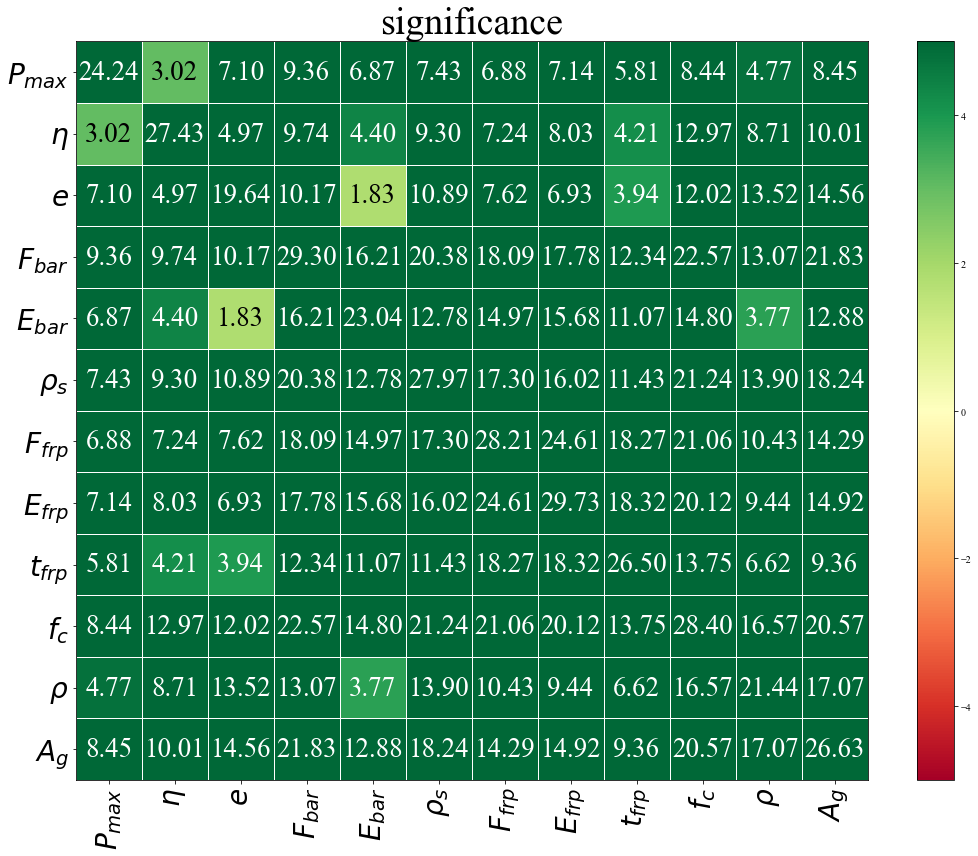

In [21]:
plt.rcParams["font.family"] = "Times New Roman" # ou serif
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=Sxindex, 
                        y_labels=Syindex, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=2.7, figsize=(15,12))
plt.yticks(fontname='Times New Roman', fontsize=28)

plt.xticks(fontname='Times New Roman', fontsize=28)
plt.tight_layout()

# 3.3. Pairwise Relationships

In [22]:
replacements={'Ag': r'$A_g\,(10^{4} mm^{2})$','ρ':r'$ρ\,(mm)$','fc': r'$f^\prime_c\,(MPa)$','tfrp': r'$t_{frp}\,(mm)$','Efrp': r'$E_{frp}\,(GPa)$','Ffrp': r'$F_{frp}\,(MPa)$','ρs': r'$ρ_s\,(\%)$','Ebar': r'$E_{bar}\,(GPa)$','Fbar': r'$F_{bar}\,(MPa)$','e': r'$e\,(\%)$','η': r'$η\,(\%)$','PexpF': r'$P_{exp}\,(kN)$'}

In [23]:
AgData = Data.copy()
#AgData['Ag']=AgData['Ag']*1/10000

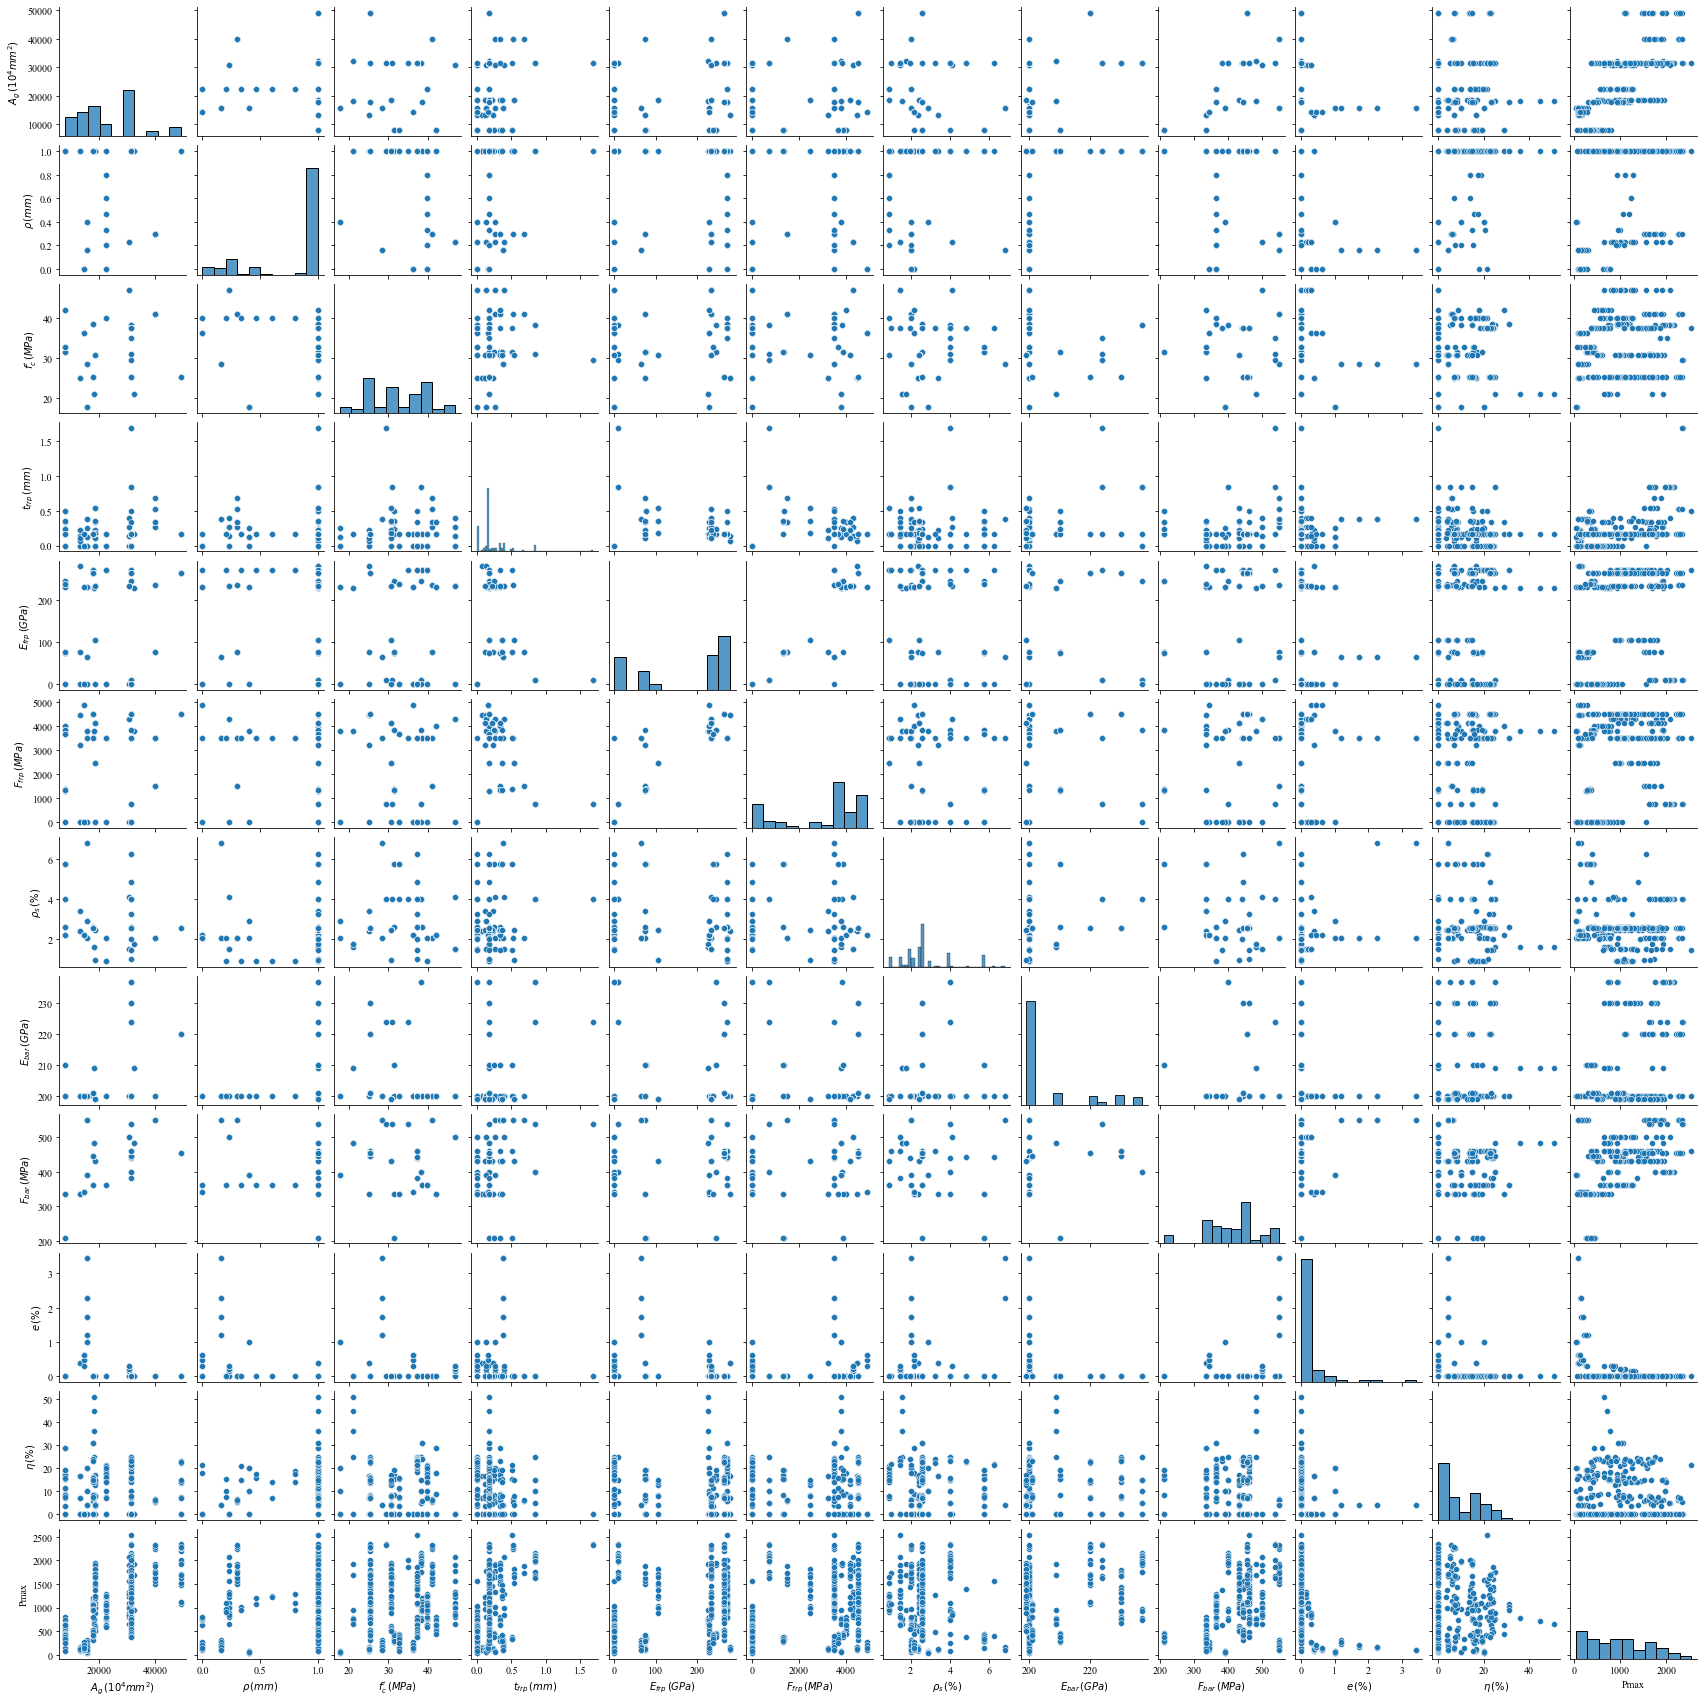

In [24]:
g=sns.pairplot(AgData, diag_kind = 'hist', height=2)


for i in range(12):
    for j in range(12):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
            
for i in range(len(g.fig.get_children()[-1].texts)):
    label = g.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        g.fig.get_children()[-1].texts[i].set_text(replacements[label])

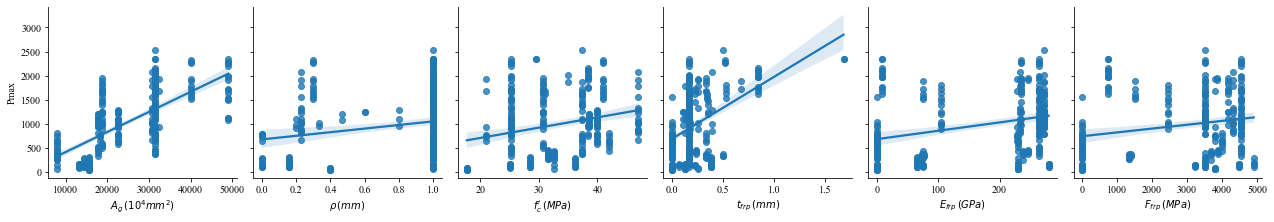

In [25]:
g = sns.pairplot(AgData, height=3, 
             x_vars=["Ag","ρ","fc","tfrp","Efrp","Ffrp"],y_vars=["Pmax"],kind="reg",diag_kind=None )

for i in range(1):
    for j in range(6):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
            
for i in range(len(g.fig.get_children()[-1].texts)):
    label = g.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        g.fig.get_children()[-1].texts[i].set_text(replacements[label])

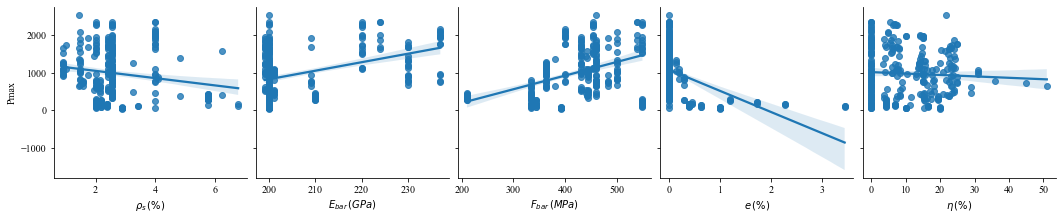

In [26]:
g = sns.pairplot(AgData, height=3, 
             x_vars=["ρs","Ebar","Fbar","e","η"],y_vars=["Pmax"],kind="reg",diag_kind=None )

for i in range(1):
    for j in range(5):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
            
for i in range(len(g.fig.get_children()[-1].texts)):
    label = g.fig.get_children()[-1].texts[i].get_text()
    if label in replacements.keys():
        g.fig.get_children()[-1].texts[i].set_text(replacements[label])

# 4. XGBoost

In [27]:
y = Data['Pmax']
X = Data.drop('Pmax', axis = 1)

X.head()

,Ag,ρ,fc,tfrp,Efrp,Ffrp,ρs,Ebar,Fbar,e,η
No.,,,,,,,,,,,
1,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,36.0
2,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,45.0
3,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,25.0
4,18136.64,1.0,21.0,0.17,228.0,3790.0,1.563292,209.0,483.0,0.0,51.0
5,32349.07,1.0,21.0,0.17,228.0,3790.0,1.752933,209.0,483.0,0.0,0.0


In [28]:
X_train, X_test, y_train, y_test =  model_selection.train_test_split(
       X, y, test_size=0.2,random_state=105)

In [30]:
model_xgb.fit(X_train, y_train)
preds = model_xgb.predict(X_test)

In [33]:
from xgboost import plot_importance
from matplotlib import pyplot

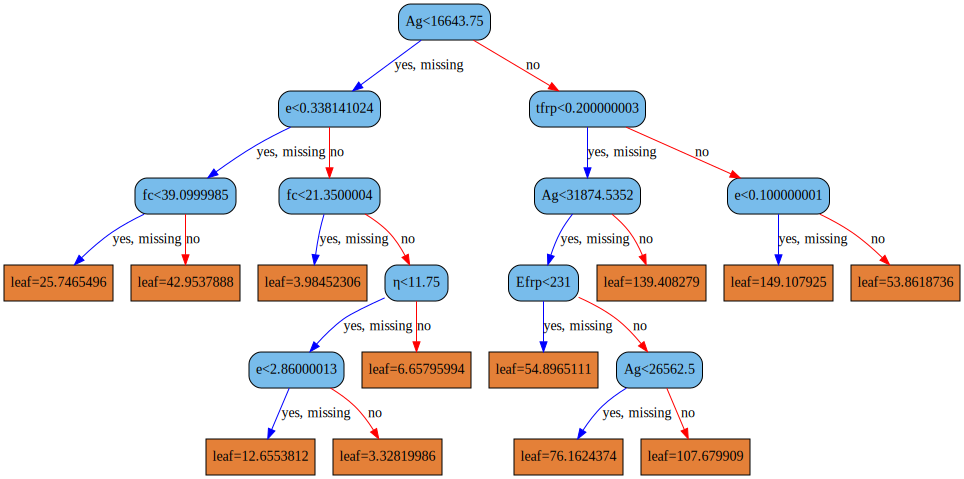

In [34]:
tr= xgb.to_graphviz(model_xgb, num_trees=2, condition_node_params={'shape': 'box',
 'style': 'filled,rounded', 'fillcolor': '#78bceb'},leaf_node_params={'shape': 'box',
 'style': 'filled',
 'fillcolor': '#e48038'})
tr

# 5. Feature Importances

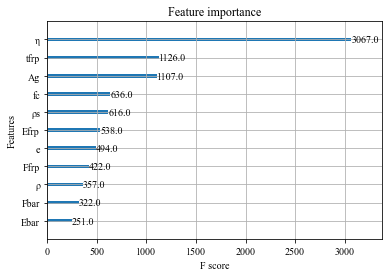

In [35]:
plot_importance(model_xgb)
pyplot.show()

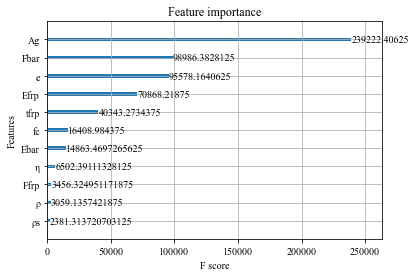

In [36]:
plot_importance(model_xgb,importance_type='gain')
pyplot.show()

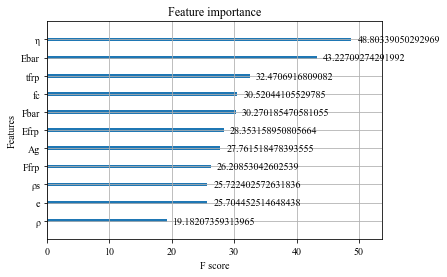

In [37]:
plot_importance(model_xgb,importance_type='cover')
pyplot.show()

# 6. Interpretation of XGBoost prediction model using SHAP values

In [38]:
featureName=[r'$A_g$',  r'$ρ$', r'$f_c$', 
             r'$t_{frp}$',
       r'$E_{frp}$',  r'$F_{frp}$',r'$ρ_s$',  r'$E_{bar}$',r'$F_{bar}$',r'$e$', r'$η$']

In [39]:
shap.initjs()
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# 6.1 SHAP summary plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '$ρ_s$'),
  Text(0, 1, '$ρ$'),
  Text(0, 2, '$F_{frp}$'),
  Text(0, 3, '$E_{bar}$'),
  Text(0, 4, '$F_{bar}$'),
  Text(0, 5, '$f_c$'),
  Text(0, 6, '$η$'),
  Text(0, 7, '$e$'),
  Text(0, 8, '$E_{frp}$'),
  Text(0, 9, '$t_{frp}$'),
  Text(0, 10, '$A_g$')])

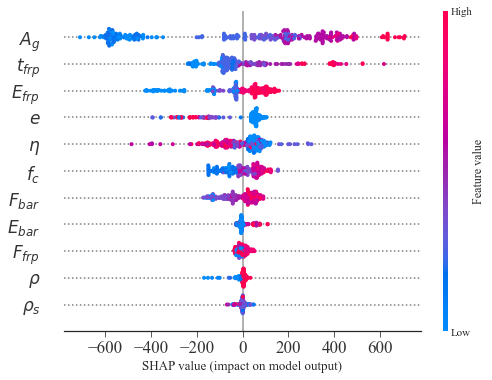

In [40]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 20
plt.rcParams["font.family"] = "Times New Roman" 

shap.summary_plot(shap_values, X, feature_names= featureName,show=False)

plt.axhline(y=0, color='gray', linestyle='dotted')
plt.axhline(y=1, color='gray', linestyle='dotted')
plt.axhline(y=2, color='gray', linestyle='dotted')
plt.axhline(y=3, color='gray', linestyle='dotted')
plt.axhline(y=4, color='gray', linestyle='dotted')
plt.axhline(y=5, color='gray', linestyle='dotted')
plt.axhline(y=6, color='gray', linestyle='dotted')
plt.axhline(y=7, color='gray', linestyle='dotted')
plt.axhline(y=8, color='gray', linestyle='dotted')
plt.axhline(y=9, color='gray', linestyle='dotted')
plt.axhline(y=10, color='gray', linestyle='dotted')

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)


# 6.2 Relative importance for each feature

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '$ρ_s$'),
  Text(0, 1, '$ρ$'),
  Text(0, 2, '$F_{frp}$'),
  Text(0, 3, '$E_{bar}$'),
  Text(0, 4, '$F_{bar}$'),
  Text(0, 5, '$f_c$'),
  Text(0, 6, '$η$'),
  Text(0, 7, '$e$'),
  Text(0, 8, '$E_{frp}$'),
  Text(0, 9, '$t_{frp}$'),
  Text(0, 10, '$A_g$')])

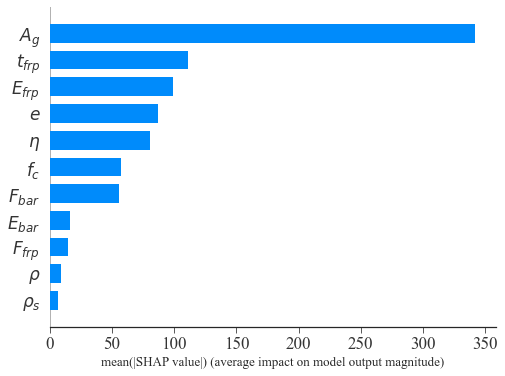

In [41]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 30
plt.rcParams["font.family"] = "Times New Roman" 
shap.summary_plot(shap_values, X, plot_type="bar",feature_names=featureName, max_display=12,show=False)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# 6.3 Explanation of typical individual prediction for specimens

In [42]:
plt.rcParams.update({'font.size': 20})

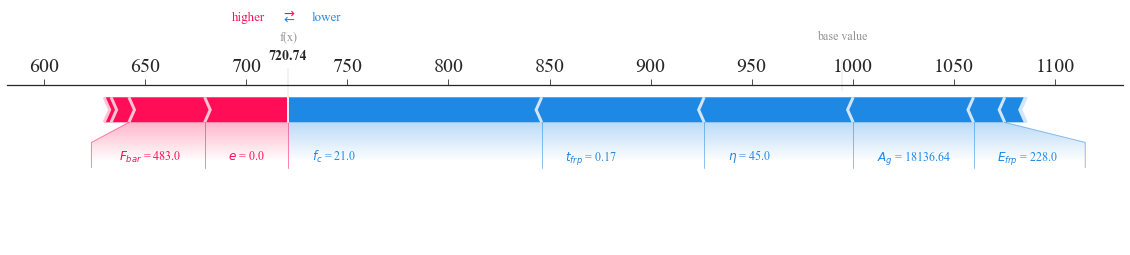

In [43]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
force=shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:], feature_names=featureName, matplotlib=True, show=False)

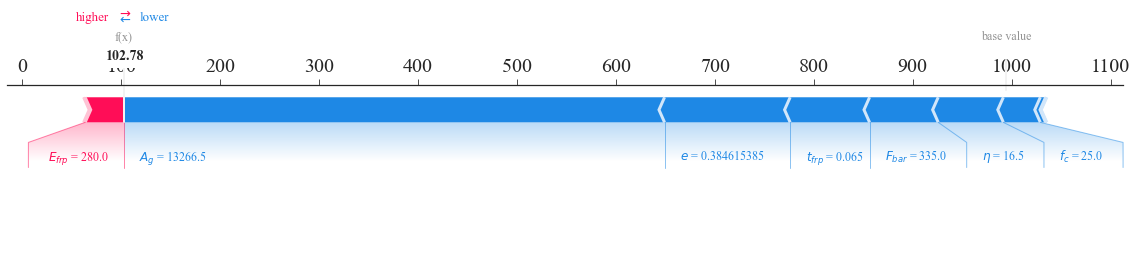

In [44]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 20
force=shap.force_plot(explainer.expected_value, shap_values[45,:], X.iloc[45,:], feature_names=featureName, matplotlib = True,show=False) 

# 6.4 SHAP Dependence Plots

In [45]:
featureName=[r'$A_g\,(mm^{2})$',  r'$ρ\,(\%)$', r'$f_c\,(MPa)$', r'$t_{frp}\,(mm)$',
       r'$E_{frp}\.(GPa)$', r'$F_{frp}\,(MPa)$',r'$ρ_s\,(\%)$',  r'$E_{bar}\,(GPa)$',r'$F_{bar}\,(MPa)$',r'$e\,(\%)$', r'$η\,(\%)$']

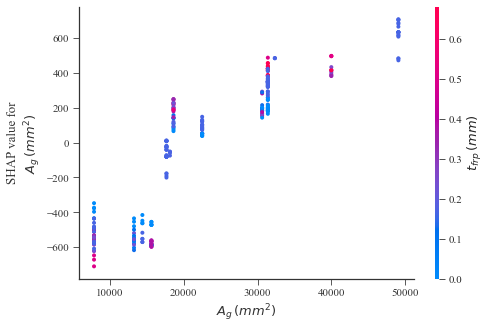

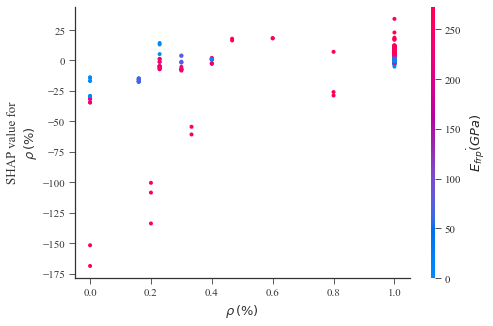

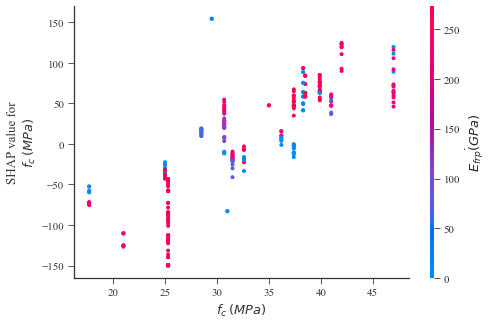

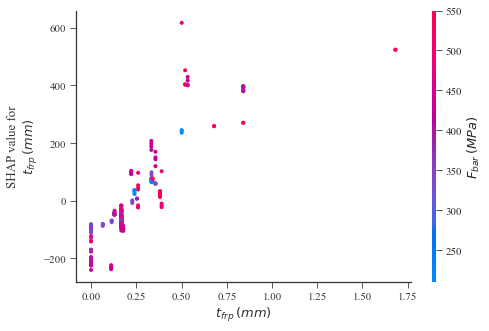

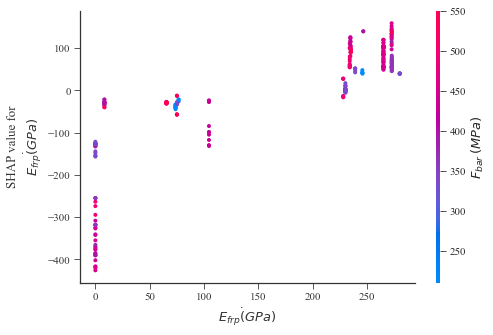

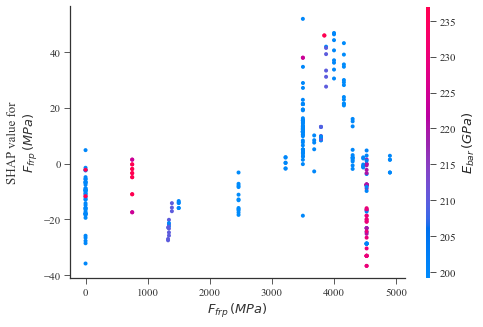

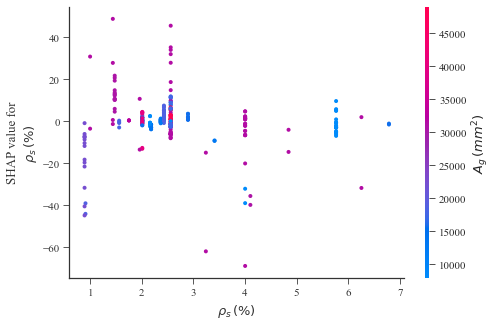

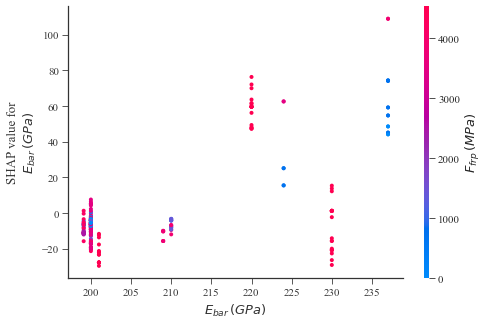

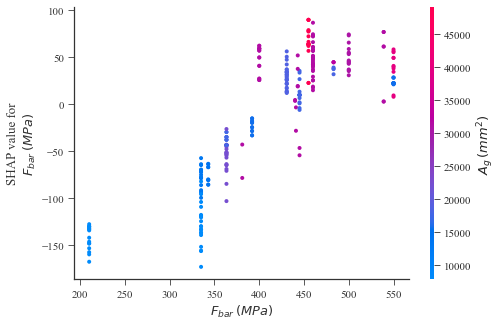

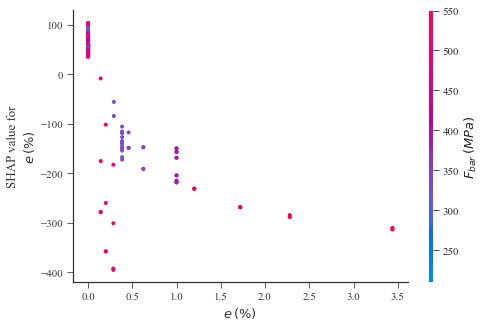

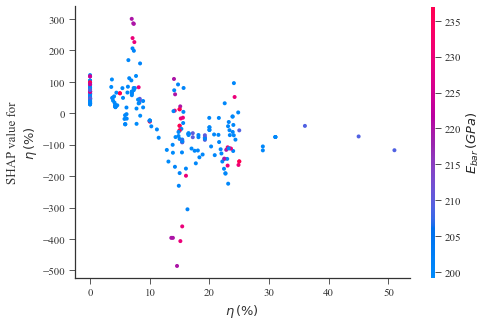

In [46]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman" # ou serif
#fig, ax = plt.subplots(figsize=(8, 5))
length = len(featureName)
for i in range(length):
    name =X_train.columns[i]
    shap.dependence_plot(i, shap_values, X,feature_names=featureName, show = False)
    plt.show()